# Проект (Классификация вина методом опорных векторов)
## Вариант 9


**Цель работы:** изучение метода опорных векторов

Продолжительность работы: - 4 часа.

Мягкий дедлайн (5 баллов): 10.10.2023

Жесткий дедлайн (2.5 баллов): 24.10.2023

Метод опорных векторов (Support Vector Machines, SVM) - это мощный алгоритм машинного обучения, который применяется как для задач классификации, так и для регрессии. Основная идея метода заключается в поиске гиперплоскости в пространстве признаков, которая лучше всего разделяет данные разных классов.

Основные идеи метода опорных векторов в задаче классификации:
<br>**Выбор гиперплоскости:** Гиперплоскость - это (N-1)-мерная подпространство в N-мерном пространстве признаков, которое разделяет данные разных классов. SVM стремится найти такую гиперплоскость, чтобы расстояние от неё до ближайшего объекта обучающей выборки (опорного вектора) было максимальным. Это расстояние называется зазором.
<br>**Определение опорных векторов:** Опорные векторы - это точки данных, которые лежат на границе зазора и играют ключевую роль в определении гиперплоскости. Эти точки используются для определения гиперплоскости, которая лучше всего разделяет классы.
  <br>**Мягкая классификация (Soft Margin):** В реальных данных может быть шум или наличие выбросов. SVM предусматривает введение параметра C (параметр регуляризации), который позволяет управлять шириной зазора и штрафует за нарушения данных внутри зазора или за пределами зазора. Мягкая классификация позволяет адаптироваться к более сложным данным.
  <br>**Функция ядра (Kernel function):** SVM можно использовать не только с линейными гиперплоскостями, но и с нелинейными. Для этого используются функции ядра, которые преобразуют данные в более высокомерные пространства, где более сложные разделяющие поверхности становятся линейными.
  <br>**Оптимизация:** Задача оптимизации SVM сводится к поиску параметров гиперплоскости так, чтобы минимизировать ошибки классификации и одновременно максимизировать зазор.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

#import xgboost as xgb
import re
import matplotlib.pyplot as plt

#from tqdm.notebook import tqdm_notebook
from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore')

In [4]:
data_source = "./wine/wine.csv"
data = pd.read_csv(data_source, delimiter=',')
data.head(200)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315ofDilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Загружаем данные из CSV-файла
data_source = "./wine/wine.csv"
data = pd.read_csv(data_source, delimiter=',')

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop('Class', axis=1)  # Предполагаем, что 'class' - это целевая переменная
y = data['Class']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создаем и обучаем модель SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Предсказываем классы для тестового набора
y_pred = svm_model.predict(X_test)

# Оцениваем производительность модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Выводим результаты
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)



Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



Precision = TP / (TP + FP), где TP - количество верно предсказанных положительных случаев, FP - количество ложноположительных случаев.
<br> Recall = TP / (TP + FN), где TP - количество верно предсказанных положительных случаев, FN - количество ложноотрицательных случаев
<br> F1-score: 
F1-score = 2 × Precision × Recall / (Precision + Recall) - гармоническое среднее между Precision и Recall
<br> Macro avg вычисляет среднее значение метрики для каждого класса независимо и затем усредняет эти значения. Это означает, что каждый класс вносит одинаковый вклад в итоговую метрику, независимо от размера класса.
<br>  Weighted avg также вычисляет среднее значение метрики для каждого класса, но учитывает дисбаланс в размерах классов, взвешивая средние значения по количеству экземпляров каждого класса.

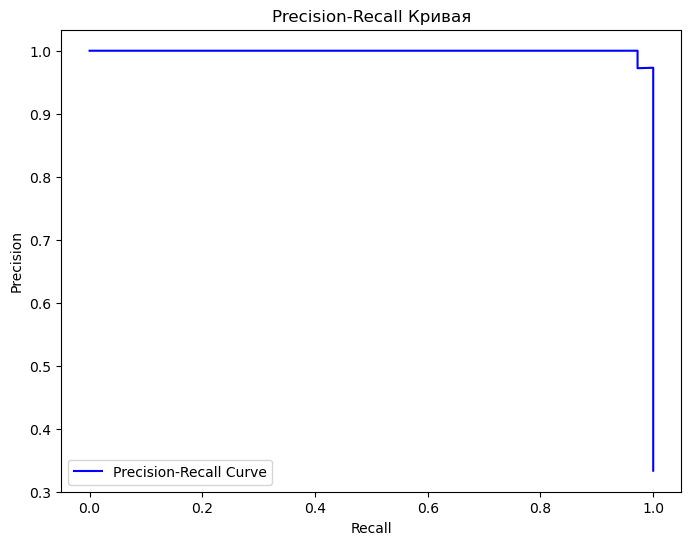

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Выбираем все признаки
X = data.drop('Class', axis=1)
y = data['Class']

# Преобразуем целевую переменную в бинарный формат
y_bin = label_binarize(y, classes=np.unique(y))

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=80)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем SVM
svm_model = OneVsRestClassifier(SVC(kernel='linear', C=1, probability=True))
svm_model.fit(X_train, y_train)

# Получаем вероятности предсказания для каждого класса
y_scores = svm_model.decision_function(X_test)

# Считаем precision и recall для различных порогов
precision, recall, thresholds = precision_recall_curve(y_test.ravel(), y_scores.ravel())

# Строим кривую Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Кривая')
plt.legend()
plt.show()

In [19]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Выбираем два признака для обучения модели
X = data[['Alcalinity_of_ash', 'Proline']]
y = data['Class']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
new_feature1 = float(input("Введите значение для Alcalinity_of_ash: "))
new_feature2 = float(input("Введите значение для Proline: "))

# Создаем массив для нового наблюдения
new_data_point = np.array([[new_feature1, new_feature2]])
#new_data_point = np.array([[25, 1030]])

# Стандартизируем новые данные
new_data_point_standardized = scaler.transform(new_data_point)

# Предсказываем класс для новых данных
predicted_class = svm_model.predict(new_data_point_standardized)

# Выводим результат
print(f"Предположение о классе по двум признакам: {predicted_class}")


Введите значение для Alcalinity_of_ash: 20
Введите значение для Proline: 1030
Предположение о классе по двум признакам: [1]


In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Выбираем все признаки
X = data.drop('Class', axis=1)
y = data['Class']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Получаем веса (важности) признаков
feature_weights = np.abs(svm_model.coef_)[0]

# Находим индексы двух наиболее важных признаков
top_two_features = np.argsort(feature_weights)[-2:]

# Выводим имена этих признаков
feature_names = X.columns
top_feature_names = feature_names[top_two_features]
print("Наиболее важные признаки:", top_feature_names)

Наиболее важные признаки: Index(['Alcalinity_of_ash', 'Proline'], dtype='object')


ValueError: cannot reshape array of size 7500 into shape (50,50)

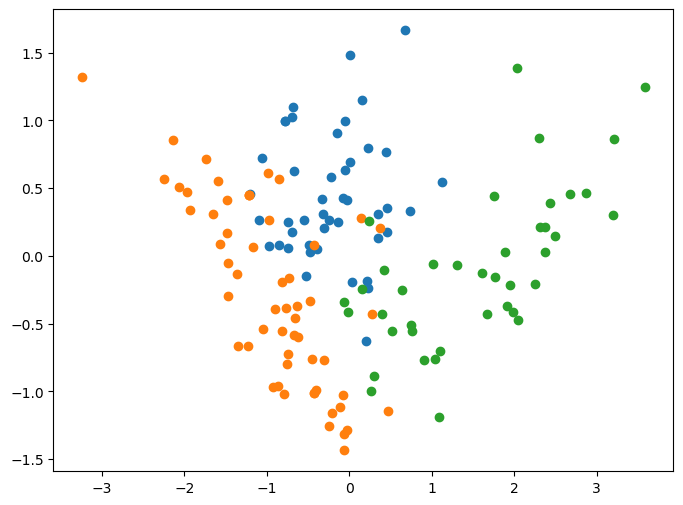

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Предположим, что X_train имеет два признака (2D)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Обучим модель на двухмерных данных
svm_model.fit(X_train_2d, y_train)

# Построим график рассеяния для тренировочных данных
plt.figure(figsize=(8, 6))

# Разбиваем данные по классам
for i in np.unique(y_train):
    plt.scatter(X_train_2d[y_train == i, 0], X_train_2d[y_train == i, 1], label=f'Class {i}')

# Рисуем разделяющую гиперплоскость
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Создаем сетку для предсказаний
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Отображаем разделяющую гиперплоскость и границы зазора
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM Classification with Decision Boundary')
plt.xlabel('Alcalinity_of_ash')
plt.ylabel('Proline')
plt.legend()
plt.show()


ValueError: cannot reshape array of size 7500 into shape (50,50)

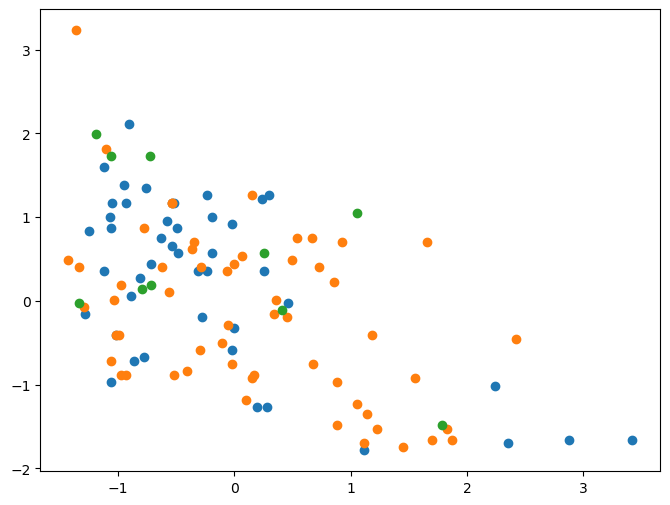

In [64]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Выбираем два признака для визуализации
X = data[['Color_intensity', 'Hue']]
y = data['Class']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Создаем DataFrame для визуализации
df_visualize = pd.DataFrame(data=X_train, columns=['Color_intensity', 'Hue'])
df_visualize['Class'] = y_train

# Визуализируем результаты
plt.figure(figsize=(8, 6))

# Разбиваем данные по классам
for i in np.unique(y_train):
    plt.scatter(df_visualize[df_visualize['Class'] == i]['Color_intensity'], 
                df_visualize[df_visualize['Class'] == i]['Hue'], 
                label=f'Class {i}')

# Рисуем разделяющую гиперплоскость
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Создаем сетку для предсказаний
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Преобразуем Z в двумерный массив
Z = Z.reshape(xx.shape[0], xx.shape[1])

# Отображаем разделяющую гиперплоскость и границы зазора
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


plt.title('SVM Classification with Decision Boundary')
plt.xlabel('Color_intensity')
plt.ylabel('Hue')
plt.legend()
plt.show()


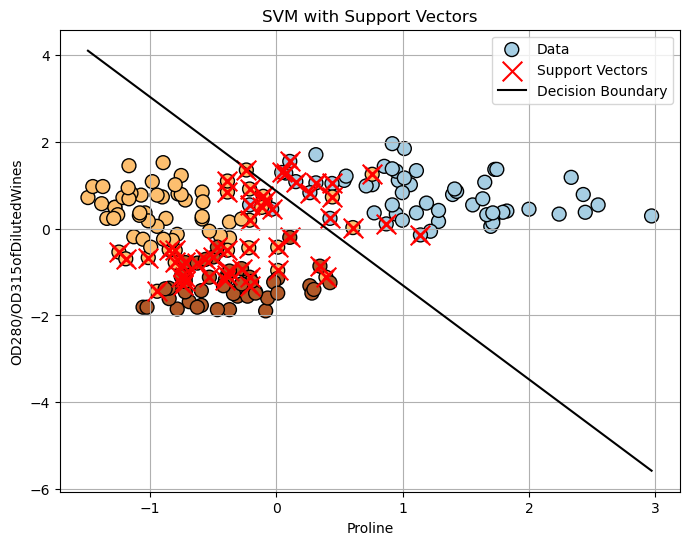

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Выбираем два признака для обучения модели
X = data[['Proline', 'OD280/OD315ofDilutedWines']]
y = data['Class']

# Стандартизируем данные
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
support_vectors = svm_model.support_vectors_
coef = svm_model.coef_[0]
intercept = svm_model.intercept_[0]
# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_standardized, y)

# Построение графика
plt.figure(figsize=(8, 6))

# Рисуем точки данных
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=100, label='Data')

# Рисуем опорные векторы
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', s=200, label='Support Vectors')

# Рисуем разделяющую гиперплоскость
xx = np.linspace(X_standardized[:, 0].min(), X_standardized[:, 0].max(), 100)
yy = -(coef[0]/coef[1]) * xx - intercept/coef[1]
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Подгоняем код для представления гиперплоскости
for i in range(len(support_vectors)):
    plt.plot([support_vectors[i, 0]], [support_vectors[i, 1]], 'x', color='red', markeredgewidth=2, markersize=10)

plt.title('SVM with Support Vectors')
plt.xlabel('Proline')
plt.ylabel('OD280/OD315ofDilutedWines')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# Выбираем три признака для обучения модели
X = data[['Proline', 'OD280/OD315ofDilutedWines', 'Magnesium']]
y = data['Class']

# Стандартизируем данные
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Обучаем SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_standardized, y)

# Получаем опорные векторы
support_vectors = svm_model.support_vectors_

# Вычисляем r
r = np.exp(-(X_standardized[:, :2] ** 2).sum(1))

def plot_3D(elev=20, azim=30, X=X_standardized, y=y, r=r):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Proline (Standardized)')
    ax.set_ylabel('OD280/OD315ofDilutedWines (Standardized)')
    ax.set_zlabel('Magnesium')
    
    # Добавляем опорные векторы
    ax.scatter3D(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], color='red', marker='x', s=200, label='Support Vectors')

# Используем interact для взаимодействия с графиком
interact(plot_3D, elev=(0, 90), azim=(-180, 180), X=fixed(X_standardized), y=fixed(y), r=fixed(r))
plt.show()



interactive(children=(IntSlider(value=20, description='elev', max=90), IntSlider(value=30, description='azim',…